In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Load data

In [7]:
train_path = 'data/train.txt'
df = pd.read_csv(train_path)

# Drop index column
df = df.drop(df.columns[0], axis=1)
df.columns


Index(['AGE', 'WORKCLASS', 'EDUCATION', 'EDUCATIONAL-NUM', 'MARITAL-STATUS',
       'OCCUPATION', 'RELATIONSHIP', 'GENDER', 'CAPITAL-GAIN', 'CAPITAL-LOSS',
       'HOURS-PER-WEEK', 'INCOME'],
      dtype='object')

In [19]:
df.head()

,AGE,WORKCLASS,EDUCATION,EDUCATIONAL-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,GENDER,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,INCOME
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,1
4,18,?,Some-college,10,Never-married,?,Own-child,Female,0,0,30,0


# EDA

In [20]:
# Describe Datafram
df.describe()

,AGE,EDUCATIONAL-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,INCOME
count,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.64420,10.078967,1073.053400,87.860600,40.444667,0.237667
std,13.74484,2.560407,7467.692711,402.574338,12.389786,0.425661
min,17.00000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.00000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.00000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.00000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.00000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [12]:
# Check missing values
missing_values = df.isnull().sum()
print("MISSING VALUES")
missing_values


MISSING VALUES


AGE                0
WORKCLASS          0
EDUCATION          0
EDUCATIONAL-NUM    0
MARITAL-STATUS     0
OCCUPATION         0
RELATIONSHIP       0
GENDER             0
CAPITAL-GAIN       0
CAPITAL-LOSS       0
HOURS-PER-WEEK     0
INCOME             0
dtype: int64

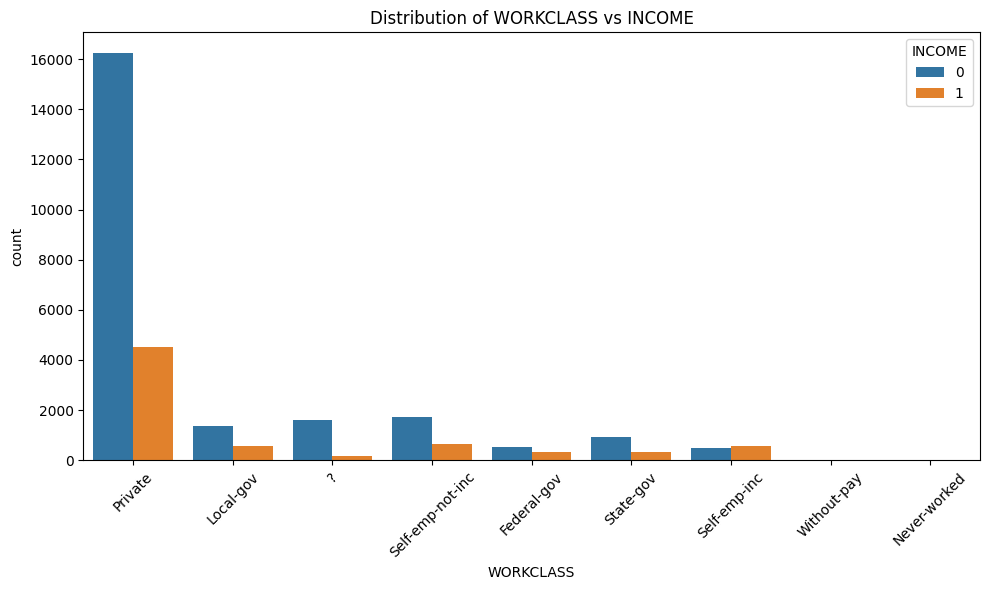

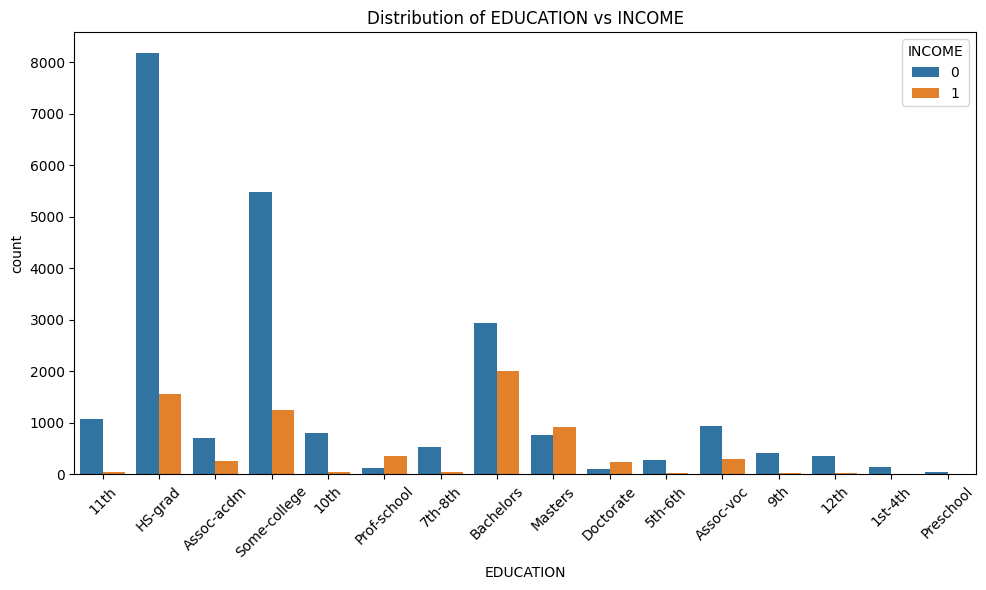

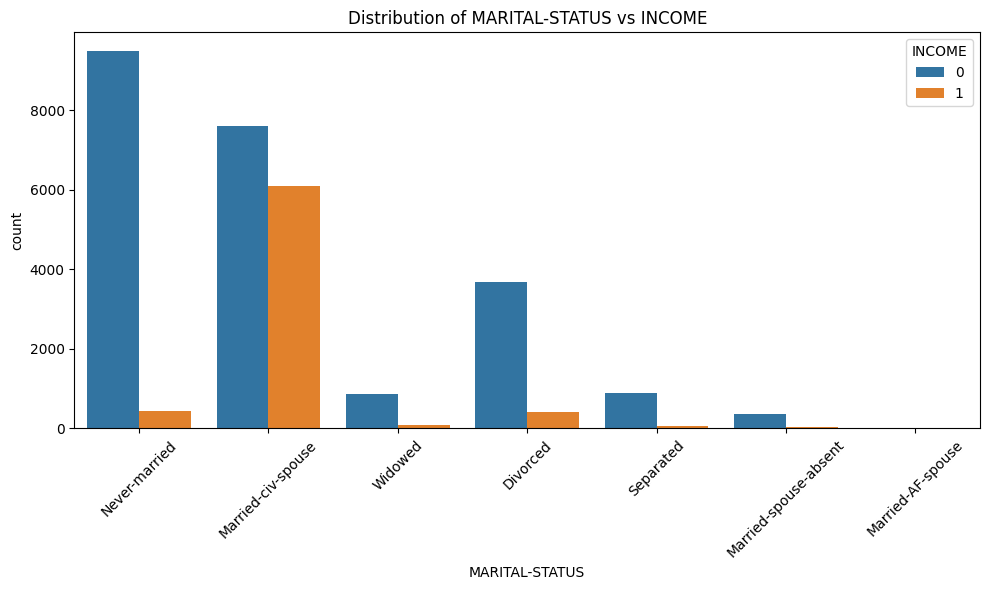

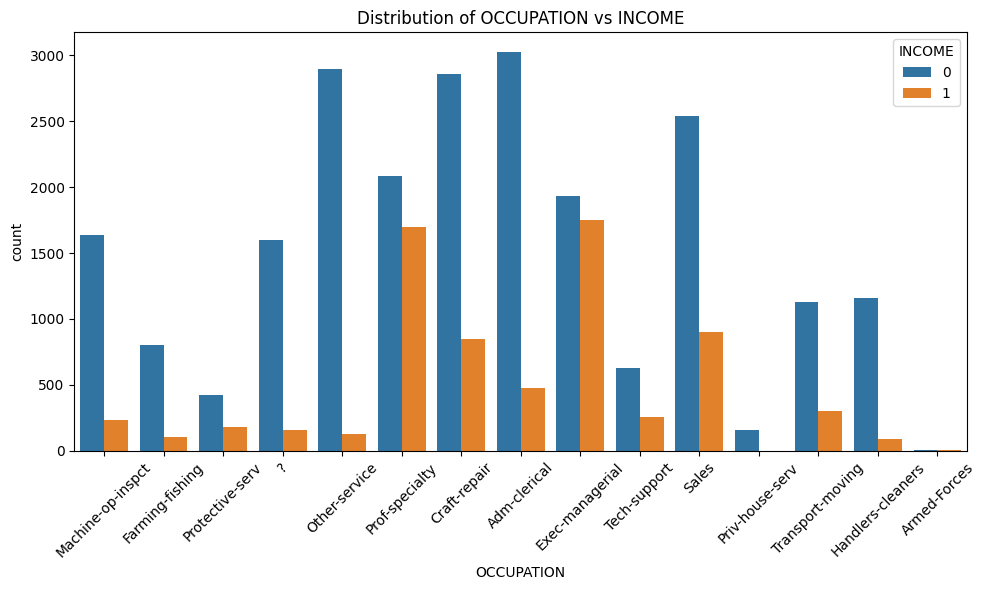

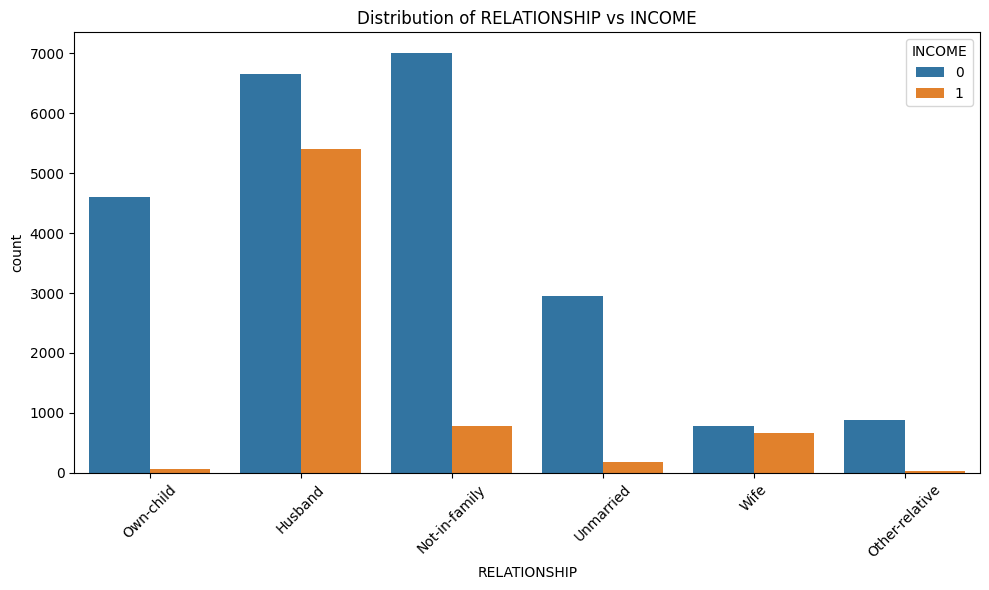

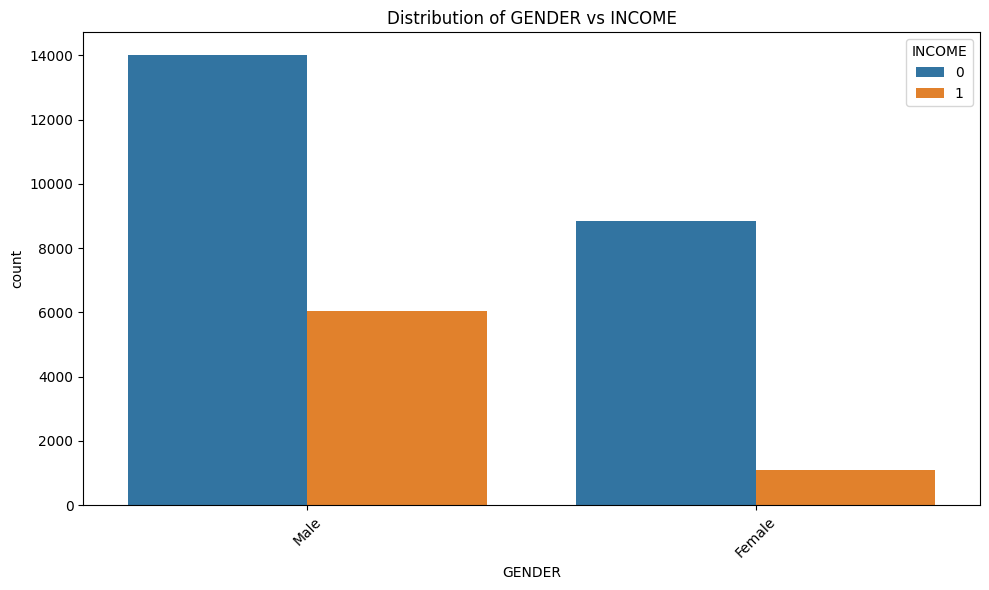

In [13]:
def plot_categorical_vs_income(data, column, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.countplot(x=column, hue="INCOME", data=data)
    plt.title(f"Distribution of {column} vs INCOME")
    plt.xticks(rotation=45)
    plt.tight_layout()

# Categorical columns to plot
categorical_columns = ['WORKCLASS', 'EDUCATION', 'MARITAL-STATUS', 'OCCUPATION', 'RELATIONSHIP', 'GENDER']

# Plotting each categorical column against INCOME
for column in categorical_columns:
    plot_categorical_vs_income(df, column)

plt.show()

<Figure size 1200x800 with 0 Axes>

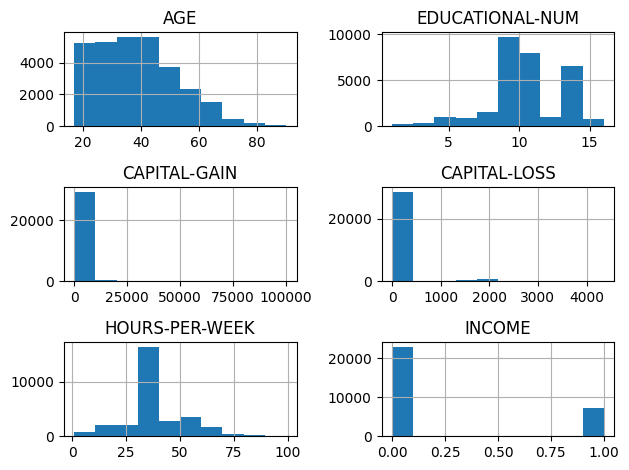

In [21]:
# Visualize Distributions
plt.figure(figsize=(12,8))
df.hist()
plt.tight_layout()
plt.show()

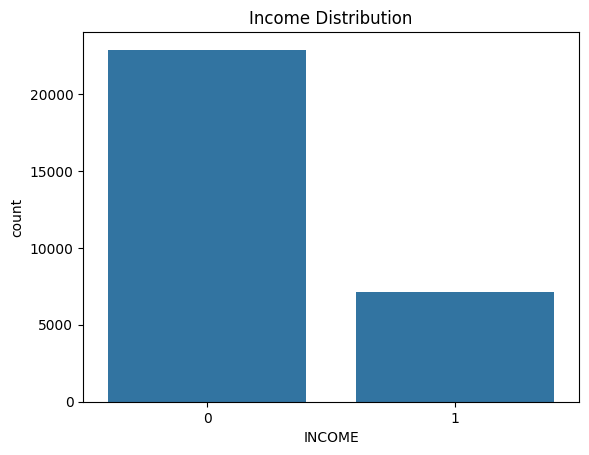

In [23]:
# Distribution of the 'INCOME' column
sns.countplot(x='INCOME', data=df)
plt.title('Income Distribution')
plt.show()

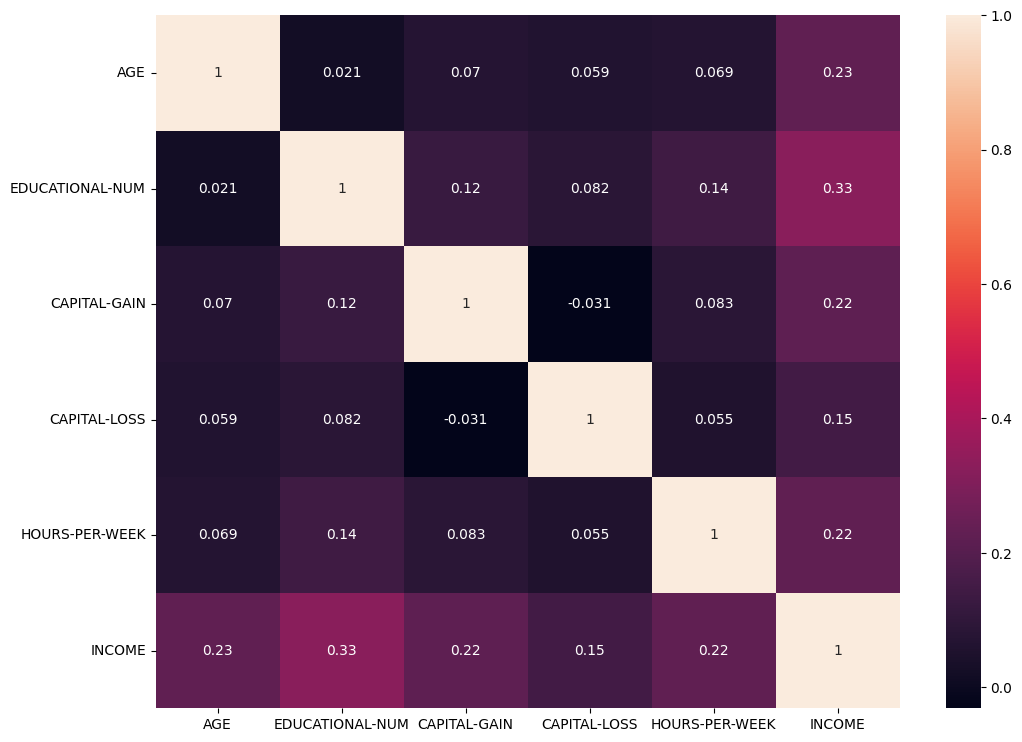

In [25]:
# Correlation matrix heatmap
non_object_columns = df.select_dtypes(exclude=['object'])
plt.subplots(figsize=(12,9))
sns.heatmap(non_object_columns.corr(), annot=True)
plt.show()

## Cleaning

In [14]:
# Number of missing values in each column of training data
missing_val = (df == '?').sum()

# Replace '?' with NaN (Not a Number)
df.replace('?', np.nan, inplace=True)

print("Missing values in data :")
print(missing_val[missing_val > 0])

Missing values in data :
WORKCLASS     1750
OCCUPATION    1755
dtype: int64


In [15]:
# Identifying numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['AGE', 'EDUCATIONAL-NUM', 'CAPITAL-GAIN', 'CAPITAL-LOSS',
       'HOURS-PER-WEEK', 'INCOME'],
      dtype='object')
Categorical Columns: Index(['WORKCLASS', 'EDUCATION', 'MARITAL-STATUS', 'OCCUPATION',
       'RELATIONSHIP', 'GENDER'],
      dtype='object')


In [16]:
# Imputer for numerical data - fill missing value
num_imputer = SimpleImputer(strategy='median')
# Imputer for categorical data
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [17]:
label_encoder = LabelEncoder()
for i in categorical_cols:
    df[i] = label_encoder.fit_transform(df[i])
df.head()

,AGE,WORKCLASS,EDUCATION,EDUCATIONAL-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,GENDER,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,INCOME
0,25.0,3,1,7.0,4,6,3,1,0.0,0.0,40.0,0.0
1,38.0,3,11,9.0,2,4,0,1,0.0,0.0,50.0,0.0
2,28.0,1,7,12.0,2,10,0,1,0.0,0.0,40.0,1.0
3,44.0,3,15,10.0,2,6,0,1,7688.0,0.0,40.0,1.0
4,18.0,3,15,10.0,4,9,3,0,0.0,0.0,30.0,0.0


## TRAIN

In [23]:
y = df['INCOME']
X = df.drop('INCOME', axis=1)

# Scaling numerical features
numerical_columns = ['AGE', 'EDUCATIONAL-NUM', 'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK']
# scaler = StandardScaler()
scaler = MinMaxScaler()

X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


In [24]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X, y, scoring="f1")


Base Models....


/Users/kiennguyen/interview/tpbank/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiennguyen/interview/tpbank/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

f1: 0.5153 (LR) 
f1: 0.5905 (KNN) 


KeyboardInterrupt: 

In [34]:
rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

adaboost_params = {"n_estimator" : [20, 50, 100],
                   "learning_rate" : [0.8, 1.0, 1.7]}

catboost_params = {
        "iterations": [100, 200],
        "learning_rate": [0.1, 0.01],
        "depth": [3, 4]
    }

classifiers = [('RF', RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('CatBoost', CatBoostClassifier(), catboost_params)]

def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

best_models = hyperparameter_optimization(X_train, y_train, scoring='accuracy')


Hyperparameter Optimization....
########## RF ##########
accuracy (Before): 0.8476


/Users/kiennguyen/interview/tpbank/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kiennguyen/interview/tpbank/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kiennguyen/interview/tpbank/.venv/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/kiennguyen/interview/tpbank/.venv/lib/python3.8/site-packages/sklearn/base.py", line 638, in

accuracy (After): 0.863
RF best params: {'max_depth': 15, 'max_features': 5, 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost ##########
accuracy (Before): 0.8701
accuracy (After): 0.8718
XGBoost best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

########## CatBoost ##########
Learning rate set to 0.035394
0:	learn: 0.6569797	total: 4.64ms	remaining: 4.63s
1:	learn: 0.6236271	total: 8.77ms	remaining: 4.38s
2:	learn: 0.5962579	total: 13ms	remaining: 4.32s
3:	learn: 0.5684715	total: 17ms	remaining: 4.23s
4:	learn: 0.5473903	total: 20.6ms	remaining: 4.1s
5:	learn: 0.5273797	total: 24.6ms	remaining: 4.08s
6:	learn: 0.5105938	total: 28.5ms	remaining: 4.04s
7:	learn: 0.4946210	total: 32.3ms	remaining: 4s
8:	learn: 0.4801277	total: 36.6ms	remaining: 4.03s
9:	learn: 0.4660361	total: 40.6ms	remaining: 4.02s
10:	learn: 0.4530054	total: 46.8ms	remaining: 4.21s
11:	learn: 0.4415638	total: 51ms	remaining: 4.2s
12:	learn: 0.4319249	total: 54.9ms	remaining: 4.1

## TESTING

In [35]:
def voting_classifier(best_models, X, y):
    print("Voting Classifier...")

    voting_clf = VotingClassifier(estimators=[('RF', best_models["RF"]),
                                              ('XGBoost', best_models["XGBoost"]),
                                              ('CatBoost', best_models["CatBoost"])],
                                  voting='soft').fit(X, y)

    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

voting_clf = voting_classifier(best_models, X_test, y_test)
voting_clf

Voting Classifier...


0:	learn: 0.6195334	total: 1.6ms	remaining: 318ms
1:	learn: 0.5582386	total: 3.03ms	remaining: 300ms
2:	learn: 0.5241628	total: 4ms	remaining: 263ms
3:	learn: 0.4872596	total: 5.11ms	remaining: 250ms
4:	learn: 0.4694281	total: 6.24ms	remaining: 243ms
5:	learn: 0.4518973	total: 7.56ms	remaining: 244ms
6:	learn: 0.4318072	total: 8.73ms	remaining: 241ms
7:	learn: 0.4138062	total: 9.75ms	remaining: 234ms
8:	learn: 0.4020738	total: 11ms	remaining: 234ms
9:	learn: 0.3919050	total: 12ms	remaining: 228ms
10:	learn: 0.3841566	total: 13ms	remaining: 223ms
11:	learn: 0.3782370	total: 14ms	remaining: 220ms
12:	learn: 0.3718299	total: 15ms	remaining: 216ms
13:	learn: 0.3683029	total: 16.1ms	remaining: 215ms
14:	learn: 0.3629440	total: 17.2ms	remaining: 212ms
15:	learn: 0.3596736	total: 18.2ms	remaining: 210ms
16:	learn: 0.3552781	total: 19.2ms	remaining: 207ms
17:	learn: 0.3512707	total: 20.1ms	remaining: 203ms
18:	learn: 0.3485109	total: 21.1ms	remaining: 201ms
19:	learn: 0.3443861	total: 22.1ms	r

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_depth=15,
                                                     max_features=5,
                                                     min_samples_split=15,
                                                     n_estimators=200)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            fe...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('CatBoost',
                              <catboost.core.CatBoostClassifier object at 0x12d6ae850>)],
                 voting='soft')